In [1]:
using Markdown

In [2]:
using Plots, LaTeXStrings, DifferentialEquations, Distributions

# Chapter 1 Figures. Statistics

In [3]:
random_count() = floor(Int, n_min + rand() * n_max)

random_count (generic function with 1 method)

In [4]:
begin
	affect1!(integrator) = integrator.u += 1
	affect2!(integrator) = integrator.u -= 1
	prod1Jump(A) = ConstantRateJump((u, p, t) -> A, affect1!)
	deg1Jump = ConstantRateJump((u, p, t) -> u, affect2!)
	u01 = 0
	t1 = (0.0, 15.0)
	dprob1 = DiscreteProblem(u01, t1)
	jprob1 = JumpProblem(dprob1, Direct(), prod1Jump(100), deg1Jump)
	continous(A) = t -> -A*ℯ^(-t) + A
end

continous (generic function with 1 method)

In [5]:
sol1 = solve(jprob1, SSAStepper())

retcode: Default
Interpolation: Piecewise constant interpolation
t: 2889-element Vector{Float64}:
  0.0
  0.00803435103868356
  0.01644228913571986
  0.02515650665638089
  0.02833672754581886
  0.03266186905902616
  0.0390289303161781
  0.04281924616315776
  0.05186817637866441
  0.08136623177880628
  0.08261580381083168
  0.10313997571557842
  0.10831136722146792
  ⋮
 14.975221905890992
 14.976954816256844
 14.98055245320968
 14.98329009595046
 14.983439819227131
 14.98465096125241
 14.987125848373976
 14.996258861782485
 14.996569550145967
 14.998414386829175
 14.999805487369157
 15.0
u: 2889-element Vector{Int64}:
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
   9
  10
   ⋮
 119
 120
 119
 120
 121
 120
 119
 120
 119
 118
 117
 117

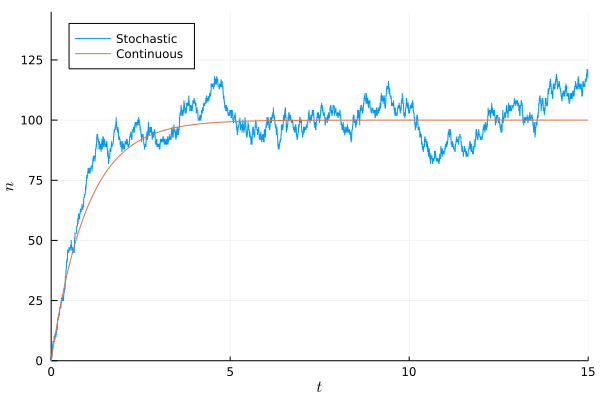

In [6]:
begin
	plot(sol1, label="Stochastic", legend=:topleft)
	p1 = plot!(continous(100), sol1.t, label="Continuous", xlabel=L"t", ylabel=L"n", ylimit=(0,145))
end

In [7]:
begin
	last_ones = []
	num_samples=10000 
	for _ ∈ 1:num_samples
		push!(last_ones, solve(jprob1, SSAStepper()).u[end])
	end
	last_ones
end

10000-element Vector{Any}:
 105
 101
  94
  92
  91
 102
 106
 101
 113
  89
 114
  92
 102
   ⋮
  80
 112
  86
  89
  75
  96
  81
  93
  93
 112
 103
 107

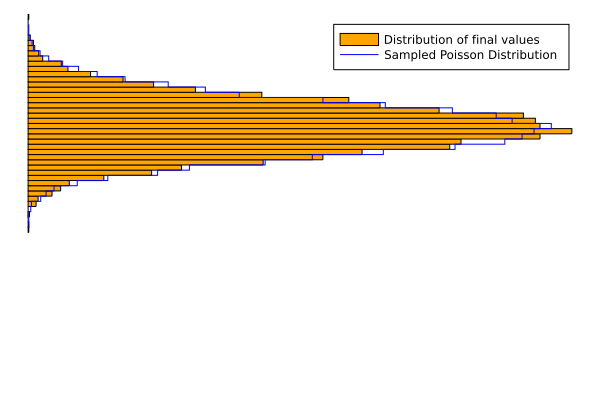

In [8]:
begin
	# poisson(mean)
	histogram(last_ones, label="Distribution of final values", color=:orange, orientation=:h)
	p2 = plot!(rand(Poisson(100), num_samples), seriestype=:stephist, label="Sampled Poisson Distribution", color=:blue, orientation=:h, ylimit=(0,145), ticks=nothing, yaxis=false, xaxis=false)
end

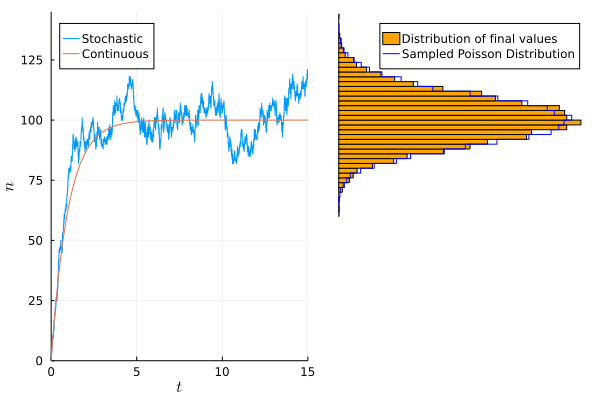

In [9]:
pf = plot(p1, p2)

In [10]:
savefig(pf, "ch1_stochastic.pdf")